In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
data = pd.read_csv('OnlineNewsPopularity-3.csv')
data

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
...                                                  ...        ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                      0.815385        4.0             2.0       1.0  ...   
1                      0.791946        3.0             1.0       1.0  ...   
2                      0.663866        3.0             1.0       1.0  ...   
3                      0.665635        9.0             0.0       1.0  ...   
4                      0.540890       19.0            19.0      20.0  ...   
...                         ...        ...             ...       ...  ...   
39639                  0.684783        9.0             7.0       1.0  ...   
39640                  0.885057        9.0             7.0       3.0  ...   
39641                  0.644128       24.0             1.0      12.0  ...   
39642                  0.692661       10.0             1.0       1.0  ...   
39643                  0.846154        1.0             1.0       0.0  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.5

In [3]:
# to check the shape or the dataframe
data.shape

(39644, 61)

In [5]:
# since we won't to classify we will look for the 50 pecental of the share price and input either 0 or 1 
data.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [9]:
# looks like the 50% is 1400 then we can input share price lower than 1400 as 0 and high as 1

In [6]:
#This is a function that will input 0 for lower an 1400 and 1 for otherwhuse 
data['shares'] = np.where(data['shares']<= 1400, 0, 1)

In [8]:
data.shares.value_counts()

0    20082
1    19562
Name: shares, dtype: int64

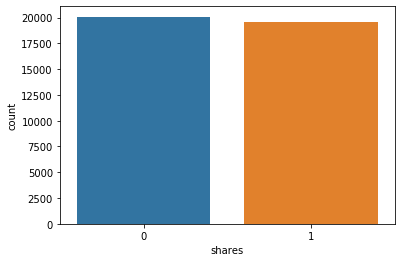

In [9]:
sns.countplot(data.shares)

In [11]:
#equally distributed
data.corr().round(3)

_is_entertainment                 -0.126                 -0.105   
data_channel_is_bus                             0.057                  0.062   
data_channel_is_socmed                          0.004                  0.001   
data_channel_is_tech                            0.115                  0.116   
data_channel_is_world                           0.029                 -0.069   
kw_min_min                                      0.017                  0.050   
kw_max_min                                     -0.006                 -0.004   
kw_avg_min                                     -0.004                  0.001   
kw_min_max                                     -0.004                  0.003   
kw_max_max                                     -0.019                 -0.055   
kw_avg_max                                     -0.021                  0.014   
kw_min_avg                                     -0.020                 -0.004   
kw_max_avg                                     -0.048                 -0.024   
kw_avg_avg                                     -0.073                 -0.020   
self_reference_min_shares                      -0.040                 -0.011   
self_reference_max_shares                      -0.054                 -0.047   
self_reference_avg_sharess                     -0.054                 -0.029   
weekday_is_monday                               0.000                  0.001   
weekday_is_tuesday                              0.011                  0.013   
weekday_is_wednesday                            0.010                  0.012   
weekday_is_thursday                             0.009                  0.008   
weekday_is_friday                              -0.009                 -0.001   
weekday_is_saturday                            -0.015                 -0.030   
weekday_is_sunday                              -0.019                 -0.023   
is_weekend                                     -0.026                 -0.039   
LDA_00                                          0.041                  0.039   
LDA_01                                         -0.103                 -0.061   
LDA_02                                          0.038                 -0.069   
LDA_03                                         -0.114                 -0.026   
LDA_04                                          0.120                  0.104   
global_subjectivity                            -0.443                 -0.350   
global_sentiment_polarity                       0.230                  0.285   
global_rate_positive_words                     -0.132                 -0.115   
global_rate_negative_words                     -0.352                 -0.478   
rate_positive_words                            -0.035                  0.089   
rate_negative_words                            -0.347                 -0.453   
avg_positive_polarity                          -0.276                 -0.232   
min_positive_polarity                          -0.064                  0.091   
max_positive_polarity                          -0.269                 -0.361   
avg_negative_polarity                           1.000                  0.749   
min_negative_polarity                           0.749                  1.000   
max_negative_polarity                           0.580                  0.081   
title_subjectivity                             -0.076                 -0.058   
title_sentiment_polarity                        0.086                  0.079   
abs_title_subjectivity                         -0.007                 -0.011   
abs_title_sentiment_polarity                   -0.076                 -0.058   
shares                                         -0.006                 -0.004   

                                max_negative_polarity  title_subjectivity  \
timedelta                                      -0.063              -0.016   
n_tokens_title                                  0.011               0.077   
n_tokens_content     

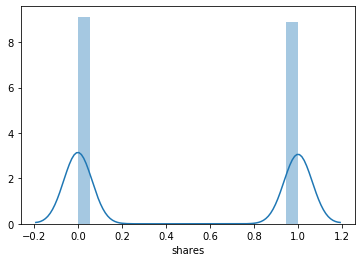

In [26]:
sns.distplot(data.shares)

In [6]:
#the url feature might not be usefull for the project so i will drop it 
data.drop(['url'],axis=1,inplace =True)

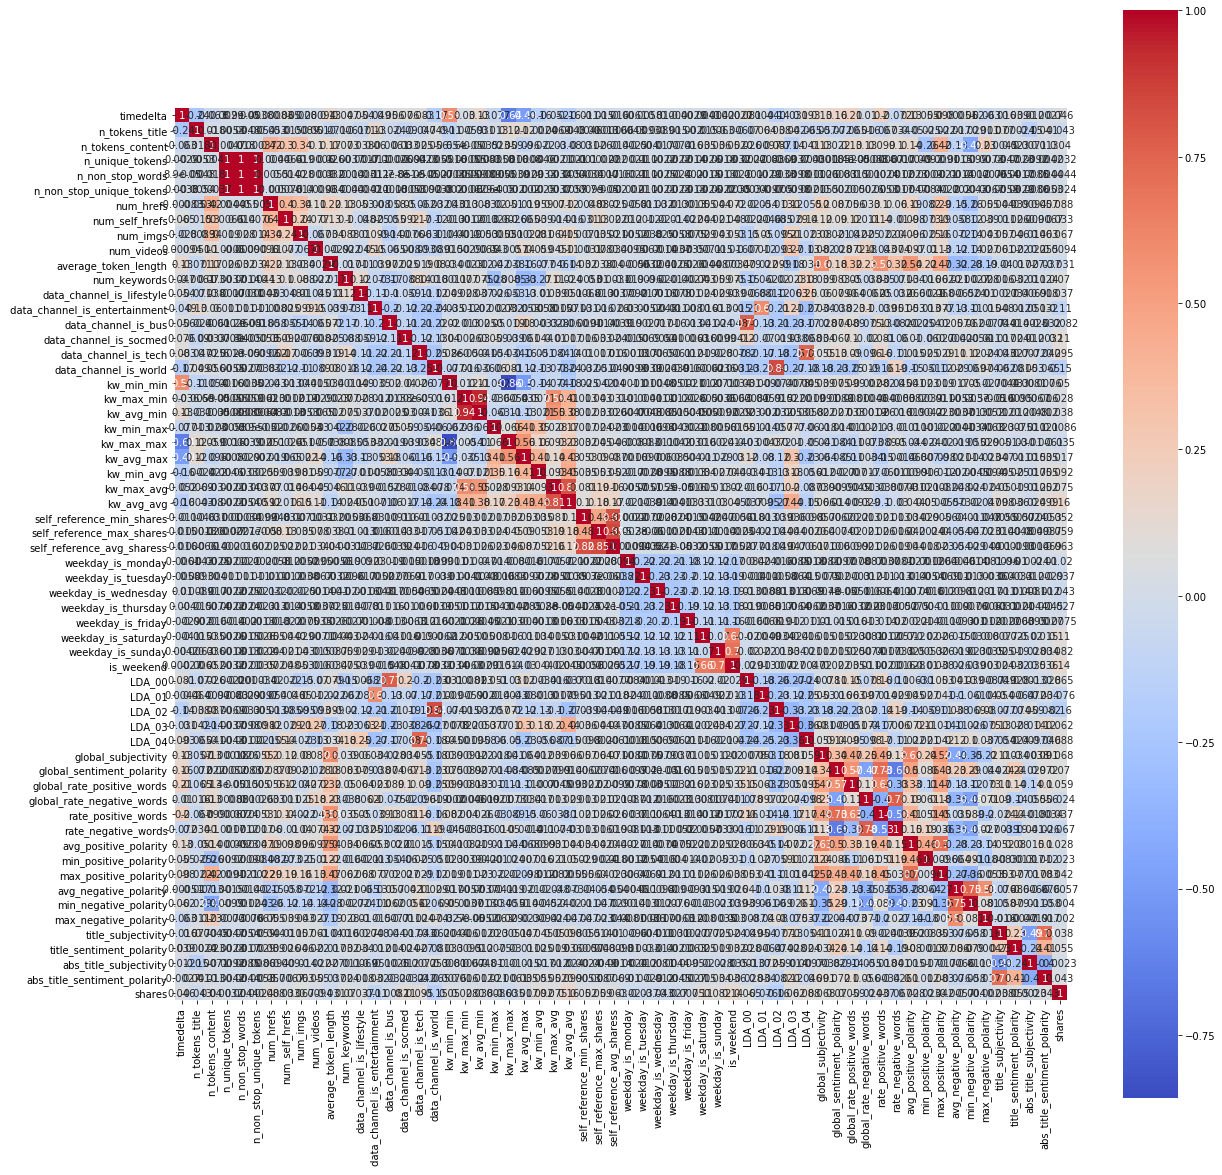

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cbar = True,  square = True,
            cmap= 'coolwarm', annot=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [8]:
X=data.drop(['shares'], axis=1)
y=data['shares']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
abc_clf = AdaBoostClassifier()
nvl_clf = BernoulliNB()


In [21]:
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('abc', abc_clf), ('nvl', nvl_clf) ],
voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [24]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf,ab_clf, nv_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.0579154474825951
